In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('/content/drive/MyDrive/Data/Train_NY_cleaned.csv')
dft= pd.read_csv('/content/drive/MyDrive/Data/Test_NY_cleaned.csv')
df.drop({'Unnamed: 0'}, axis=1, inplace=True)
dft.drop({'Unnamed: 0'}, axis=1, inplace=True)

In [ ]:
df.head(1)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,RENTALS - WALKUP APARTMENTS,392,6,10009,5,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19


In [ ]:
df.loc[df['NEIGHBORHOOD'] == 'ALPHABET CITY']['ZIP CODE'].unique()

array([10009, 10002])

In [ ]:
alph = pd.Series(df.loc[df['NEIGHBORHOOD']== 'TRAVIS']['SALE PRICE'])
alph

59021     445000.0
59022     480000.0
59023     470000.0
59024     412000.0
59025     465000.0
           ...    
59087    8250000.0
59088     600000.0
59089    2575625.0
59090    4000000.0
59091      10000.0
Name: SALE PRICE, Length: 71, dtype: float64

In [ ]:
chel = pd.Series(df.loc[df['NEIGHBORHOOD']== 'WEST NEW BRIGHTON']['SALE PRICE'])
chel

59092     415000.0
59093     631800.0
59094     499999.0
59095     585000.0
59096     585000.0
           ...    
59321      45000.0
59322     175000.0
59323     395000.0
59324     386820.0
59325    2500000.0
Name: SALE PRICE, Length: 234, dtype: float64

In [ ]:
chel2= chel.sample(71)
import scipy.stats as stats

In [ ]:
stats.ttest_ind(alph, chel)

Ttest_indResult(statistic=3.3722846815724576, pvalue=0.0008422520672824367)

In [ ]:
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'])

# Linear Regression

### With dummies

In [ ]:
df.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'BLOCK', 'LOT',
       'ZIP CODE', 'RESIDENTIAL UNITS', 'TOTAL UNITS', 'LAND SQUARE FEET',
       'GROSS SQUARE FEET', 'YEAR BUILT', 'TAX CLASS AT TIME OF SALE',
       'BUILDING CLASS AT TIME OF SALE', 'SALE PRICE', 'SALE DATE'],
      dtype='object')

In [ ]:
dum = df[['BOROUGH','NEIGHBORHOOD', 'BLOCK', 'LOT',
       'ZIP CODE', 'RESIDENTIAL UNITS', 'TOTAL UNITS', 'LAND SQUARE FEET',
       'GROSS SQUARE FEET', 'TAX CLASS AT TIME OF SALE', 'SALE PRICE']]

In [ ]:
dum = pd.get_dummies(dum, columns=['NEIGHBORHOOD'], drop_first=True)
y= dum['SALE PRICE']
dum.drop({'SALE PRICE'}, axis=1, inplace=True)

from sklearn.linear_model import  LinearRegression
lr= LinearRegression()

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(dum, y)

print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)

(44819, 262)
(44819,)
(14940, 262)


In [ ]:
lr.fit(xtrain, ytrain)
print(lr.score(xtrain,ytrain))
print(lr.score(xtest,ytest))

0.43242420508807594
0.3154237351077661


In [ ]:
xtest.shape

(14940, 262)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def func(atrue, apred):
  R2 = r2_score(atrue, apred)
  n, k= xtest.shape[0], xtest.shape[1]
  r2ad = 1 - ((1-R2)*(n-1)/(n-k-1))
  return np.sqrt(mean_squared_error(atrue, apred)), mean_absolute_error(atrue, apred), r2ad

In [ ]:
ypred = lr.predict(xtest)
func(atrue=ytest, apred=ypred)

(16447382.096594518, 1619357.1678547757, 0.30320332348401713)

In [ ]:
# Standardization
from sklearn.preprocessing import StandardScaler
st = StandardScaler()

stdf = st.fit_transform(dum)
xtrain, xtest, ytrain, ytest = train_test_split(stdf, y)

In [ ]:
lr_st= LinearRegression()
lr_st.fit(xtrain, ytrain)
print(lr_st.score(xtrain,ytrain))
print(lr_st.score(xtest,ytest))

0.44981481019468117
0.11859854272648851


In [ ]:
ypred = lr_st.predict(xtest)
func(atrue=ytest, apred=ypred)

(9501763.211998044, 1673847.4173367128, 0.1028645928862173)

### With Target Encoding

In [ ]:
!pip install category_encoders
from category_encoders import TargetEncoder
encoder = TargetEncoder()

In [ ]:
df1 = df.copy()
df.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'BLOCK', 'LOT',
       'ZIP CODE', 'RESIDENTIAL UNITS', 'TOTAL UNITS', 'LAND SQUARE FEET',
       'GROSS SQUARE FEET', 'YEAR BUILT', 'TAX CLASS AT TIME OF SALE',
       'BUILDING CLASS AT TIME OF SALE', 'SALE PRICE', 'SALE DATE'],
      dtype='object')

In [ ]:
y= df['SALE PRICE']
df.drop({'SALE PRICE'}, axis=1, inplace=True)

In [ ]:
training_set = encoder.fit_transform(df, y)

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [ ]:
training_set.drop({'SALE DATE'}, axis=1, inplace=True)

In [ ]:
st = StandardScaler()

stdf = st.fit_transform(training_set)
xtrain, xtest, ytrain, ytest = train_test_split(stdf, y)

In [ ]:
lr1= LinearRegression()
lr1.fit(xtrain, ytrain)
print(lr1.score(xtrain,ytrain))
print(lr1.score(xtest,ytest))

0.43025934558437307
0.4073354945485871


In [ ]:
ypred = lr1.predict(xtest)
func(atrue=ytest, apred=ypred)

(14881748.332500344, 1201235.5011823503, 0.40681930544428124)

### Label Encoding

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [ ]:
df['NEIGHBORHOOD'] = le.fit_transform(df['NEIGHBORHOOD'])

In [ ]:
df['BUILDING CLASS CATEGORY'] = le.fit_transform(df['BUILDING CLASS CATEGORY']) # BUILDING CLASS AT TIME OF SALE
df['BUILDING CLASS AT TIME OF SALE'] = le.fit_transform(df['BUILDING CLASS AT TIME OF SALE'])

In [ ]:
df.drop({'SALE DATE'}, axis=1, inplace=True)

In [ ]:
st = StandardScaler()

stdf = st.fit_transform(df)
xtrain, xtest, ytrain, ytest = train_test_split(stdf, y)

In [ ]:
lr2= LinearRegression()
lr2.fit(xtrain, ytrain) # Regularization and K Fold cross validation 
print(lr2.score(xtrain,ytrain))
print(lr2.score(xtest,ytest))

0.43233536116982807
-0.45498762209225907


In [ ]:
ypred = lr2.predict(xtest)
func(atrue=ytest, apred=ypred)

(14086495.654717542, 1631377.0784369223, -0.4562548630869796)

# Lasso

In [ ]:
# With dummies
dum = df1[['BOROUGH','NEIGHBORHOOD', 'BLOCK', 'LOT',
       'ZIP CODE', 'RESIDENTIAL UNITS', 'TOTAL UNITS', 'LAND SQUARE FEET',
       'GROSS SQUARE FEET', 'TAX CLASS AT TIME OF SALE']]

dum = pd.get_dummies(dum, columns=['NEIGHBORHOOD'], drop_first=True)

st = StandardScaler()

stdf = st.fit_transform(dum)
xtrain, xtest, ytrain, ytest = train_test_split(stdf, y)

In [ ]:
from sklearn.linear_model import Lasso
lr_lasso= Lasso()
lr_lasso.fit(xtrain, ytrain)
print(lr_lasso.score(xtrain,ytrain))
print(lr_lasso.score(xtest,ytest))

0.483407444894532
-0.8109763969606805


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.177552110499414e+18, tolerance: 844228679188680.4
  positive)


In [ ]:
ypred = lr_lasso.predict(xtest)
func(atrue=ytest, apred=ypred)

(8820738.201090043, 1695832.7109508722, -0.8433042443411873)

In [ ]:
# Target Encoding:

stdf = st.fit_transform(training_set)
xtrain, xtest, ytrain, ytest = train_test_split(stdf, y)

In [ ]:
lr= Lasso()
lr.fit(xtrain, ytrain)
print(lr.score(xtrain,ytrain))
print(lr.score(xtest,ytest))

0.43459649991775223
0.5048228211107297


In [ ]:
ypred = lr.predict(xtest)
func(atrue=ytest, apred=ypred)

(7873557.665592364, 1350398.0657324218, 0.504391539901728)

In [ ]:
# Label Encoding

In [ ]:
stdf = st.fit_transform(df)
xtrain, xtest, ytrain, ytest = train_test_split(stdf, y)

In [ ]:
lr= Lasso()
lr.fit(xtrain, ytrain)
print(lr.score(xtrain,ytrain))
print(lr.score(xtest,ytest))

0.45521365893453924
-1.8403969749166271


In [ ]:
ypred = lr.predict(xtest)
func(atrue=ytest, apred=ypred)

(9719728.179718234, 1671732.9457430888, -1.8428708567787413)

# Ridge

In [ ]:
# Ridge Regression

from sklearn.linear_model import RidgeCV
lr = RidgeCV(cv=5)

In [ ]:
#  With dummies


dum = df1[['BOROUGH','NEIGHBORHOOD', 'BLOCK', 'LOT',
       'ZIP CODE', 'RESIDENTIAL UNITS', 'TOTAL UNITS', 'LAND SQUARE FEET',
       'GROSS SQUARE FEET', 'TAX CLASS AT TIME OF SALE']]

dum = pd.get_dummies(dum, columns=['NEIGHBORHOOD'], drop_first=True)

st = StandardScaler()

stdf = st.fit_transform(dum)
xtrain, xtest, ytrain, ytest = train_test_split(stdf, y)

In [ ]:
lr.fit(xtrain, ytrain)
print(lr.score(xtrain,ytrain))
print(lr.score(xtest,ytest))

0.4023481246633517
0.42979092830936416


In [ ]:
ypred = lr.predict(xtest)
func(atrue=ytest, apred=ypred)

(7769366.527428468, 1572181.713254625, 0.4196120922541112)

In [ ]:
# With Target Encoding

stdf = st.fit_transform(training_set)
xtrain, xtest, ytrain, ytest = train_test_split(stdf, y)

lrridge = RidgeCV(cv=5)
lrridge.fit(xtrain, ytrain)
print(lrridge.score(xtrain,ytrain))
print(lrridge.score(xtest,ytest))

0.4391842221423189
0.5226863328044555


In [ ]:
ypred = lrridge.predict(xtest)
func(atrue=ytest, apred=ypred)

(7868708.379742021, 1368627.494708041, 0.5222706100606835)

In [ ]:
ypred_test = lrridge.predict(xtest)
from sklearn.metrics import mean_squared_error

print(np.sqrt(mean_squared_error(ytest, ypred_test)))

7868708.379742021


In [ ]:
# With Label Encoding:

stdf = st.fit_transform(df)
xtrain, xtest, ytrain, ytest = train_test_split(stdf, y)

lr = RidgeCV(cv=5)
lr.fit(xtrain, ytrain)
print(lr.score(xtrain,ytrain))
print(lr.score(xtest,ytest))

0.3332914377938069
0.39038556047129175


In [ ]:
ypred = lr.predict(xtest)
func(atrue=ytest, apred=ypred)

(8784397.337256305, 1642811.5090372665, 0.389854608594441)

In [ ]:
# Unsupervised 
# ||
# Supervised

# Neural Networks

In [ ]:
from sklearn.neural_network import MLPRegressor

In [ ]:
#mlp = MLPRegressor(hidden_layer_sizes=(100,100,100), alpha=0.2, learning_rate_init=0.2)
#mlp.fit(xtrain, ytrain)

In [ ]:
ypred = lr.predict(xtest)
func(atrue=ytest, apred=ypred)

(8784397.337256305, 1642811.5090372665, 0.389854608594441)

In [ ]:
#mlp.score(xtest, ytest)

# PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
one = pca.fit_transform(xtrain)

In [ ]:
np.cumsum(pca.explained_variance_ratio_)

array([0.25804718, 0.49876619, 0.61265197, 0.68706871, 0.75418411,
       0.80802989, 0.86098011, 0.8997836 , 0.92984841, 0.95313899,
       0.97183284, 0.98829388, 1.        ])

In [ ]:
# 8 features are explaining upto 90% 

pca= PCA(n_components=4)
pca_train = pca.fit_transform(xtrain)
pca_test = pca.transform(xtest)

lrridge.fit(pca_train, ytrain)
print(lrridge.score(pca_train,ytrain))
print(lrridge.score(pca_test,ytest))

0.0657617523949865
0.13227997813298498


In [ ]:
lr= Lasso()
lr.fit(pca_train, ytrain)
print(lr.score(pca_train,ytrain))
print(lr.score(pca_test,ytest))

0.0657617527022093
0.132286624689276


In [ ]:
stdf = st.fit_transform(training_set)
xtrain, xtest, ytrain, ytest = train_test_split(stdf, y)

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

In [ ]:
test = SelectKBest(score_func=f_regression, k=1)
fit = test.fit(xtrain,ytrain)
# summarize scores
print(fit.scores_)

[2.36715858e+02 1.23981597e+03 3.25831325e+03 1.50700130e+02
 4.27395330e+00 1.54764001e+02 7.72445756e+02 6.00496408e+02
 6.20237330e+01 1.20430237e+04 1.55119501e-01 5.01687996e+02
 2.80402218e+04]


In [ ]:
er= {i:j for i,j in zip(fit.scores_, training_set.columns)}

In [ ]:
er

{0.15511950056469706: 'YEAR BUILT',
 4.27395330090529: 'LOT',
 62.02373296123462: 'LAND SQUARE FEET',
 150.7001304595583: 'BLOCK',
 154.7640009729944: 'ZIP CODE',
 236.71585841192532: 'BOROUGH',
 501.6879957166617: 'TAX CLASS AT TIME OF SALE',
 600.496408033942: 'TOTAL UNITS',
 772.4457557658083: 'RESIDENTIAL UNITS',
 1239.815967890206: 'NEIGHBORHOOD',
 3258.313252024671: 'BUILDING CLASS CATEGORY',
 12043.02368117312: 'GROSS SQUARE FEET',
 28040.221812754604: 'BUILDING CLASS AT TIME OF SALE'}

In [ ]:
# we can see that BUILDING CLASS AT TIME OF SALE, GROSS SQUARE FEET, BUILDING CLASS CATEGORY, RESIDENTIAL UNITS, NEIGHBORHOOD, TOTAL UNITS, TAX CLASS AT TIME OF SALE are the most contributing factors

In [ ]:
ls= ['BUILDING CLASS AT TIME OF SALE', 'GROSS SQUARE FEET', 'BUILDING CLASS CATEGORY', 'RESIDENTIAL UNITS', 'NEIGHBORHOOD', 'TOTAL UNITS', 'TAX CLASS AT TIME OF SALE']

kbestdf= training_set[ls]
stdf1 = st.fit_transform(kbestdf)
xtrain, xtest, ytrain, ytest = train_test_split(stdf1, y)

In [ ]:
lr = RidgeCV(cv=5)
lr.fit(xtrain, ytrain)
print(lr.score(xtrain,ytrain))
print(lr.score(xtest,ytest))

0.3496393711553194
0.6567394810765672


In [ ]:
lr = Lasso()
lr.fit(xtrain, ytrain)
print(lr.score(xtrain,ytrain))
print(lr.score(xtest,ytest))

0.3496394787963091
0.6567340084959556


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf= RandomForestRegressor()
rf.fit(xtrain, ytrain)
print(rf.score(xtrain,ytrain))
print(rf.score(xtest,ytest))

0.849258828660621
0.5515505663248014


In [ ]:
import xgboost

In [ ]:
from xgboost import XGBRFRegressor

xg= XGBRFRegressor(n_estimators=250)
xg.fit(xtrain, ytrain)
print(xg.score(xtrain,ytrain))
print(xg.score(xtest,ytest))

[18:49:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.5864340353740126
0.5265965346551109


In [ ]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(0.5))
sel.fit_transform(xtrain)

array([[ 0.57679146, 11.0827076 ,  1.20077209, ...,  1.01704555,
        -0.12823559,  3.35670303],
       [-0.13096198, -0.06471086, -0.24974733, ..., -0.33883865,
        -0.12823559, -0.89162313],
       [-0.09803235,  0.08322036, -0.20641067, ...,  0.18051906,
         0.10241266,  0.52448559],
       ...,
       [-0.1203939 , -0.10023577, -0.24974733, ..., -0.4959355 ,
        -0.12823559, -0.89162313],
       [ 0.8630076 ,  0.01598977,  0.74996416, ..., -0.16933739,
        -0.12823559,  3.35670303],
       [-0.09491245, -0.01362819, -0.21227976, ..., -0.3980404 ,
        -0.07057353, -0.89162313]])

In [ ]:
sel.fit_transform(xtrain).shape

(44819, 7)

In [ ]:
sel.get_support()

array([ True,  True,  True,  True,  True,  True,  True])

In [ ]:
kbestdf.columns

Index(['BUILDING CLASS AT TIME OF SALE', 'GROSS SQUARE FEET',
       'BUILDING CLASS CATEGORY', 'RESIDENTIAL UNITS', 'NEIGHBORHOOD',
       'TOTAL UNITS', 'TAX CLASS AT TIME OF SALE'],
      dtype='object')

In [ ]:
from statsmodels.graphics.gofplots import qqplot

In [ ]:
ypred

In [ ]:
er= [ytest-ypred]
er= np.array(er)

In [ ]:
import statsmodels.api as sm

In [ ]:
training_set.shape

In [ ]:
training_set.head()

In [ ]:
xc= sm.add_constant(xtrain)
model = sm.OLS(ytrain, xc).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             SALE PRICE   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     3442.
Date:                Wed, 31 Mar 2021   Prob (F-statistic):               0.00
Time:                        18:49:37   Log-Likelihood:            -7.8424e+05
No. Observations:               44819   AIC:                         1.568e+06
Df Residuals:                   44811   BIC:                         1.569e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.471e+06   4.54e+04     32.378      0.0

In [ ]:
xc1= sm.add_constant(xtest)

In [ ]:
ypred = model.predict(xc1)
func(ytest, ypred)

(7891689.997475167, 1260822.7913297825, 0.6565730649697599)

In [ ]:
dg= training_set.copy()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

we = [vif(dg.values,i) for i in range(dg.shape[1])]

In [ ]:
pd.DataFrame({'cols': dg.columns, 'var': we})

,cols,var
0,BOROUGH,11.057496
1,NEIGHBORHOOD,2.167996
2,BUILDING CLASS CATEGORY,1.855132
3,BLOCK,3.730722
4,LOT,1.586059
5,ZIP CODE,556.985929
6,RESIDENTIAL UNITS,4.970568
7,TOTAL UNITS,2.975850
8,LAND SQUARE FEET,1.423518
9,GROSS SQUARE FEET,3.956709


In [ ]:
from statsmodels.stats.diagnostic import het_goldfeldquandt

In [ ]:
 het_goldfeldquandt(ytrain, xtrain)

(5.200964608012289, 0.0, 'increasing')

In [ ]:
res = model.resid

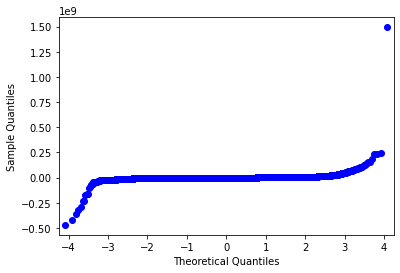

In [ ]:
fig = sm.qqplot(res)
plt.show()

In [3]:
df.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'BLOCK', 'LOT',
       'ZIP CODE', 'RESIDENTIAL UNITS', 'TOTAL UNITS', 'LAND SQUARE FEET',
       'GROSS SQUARE FEET', 'YEAR BUILT', 'TAX CLASS AT TIME OF SALE',
       'BUILDING CLASS AT TIME OF SALE', 'SALE PRICE', 'SALE DATE'],
      dtype='object')

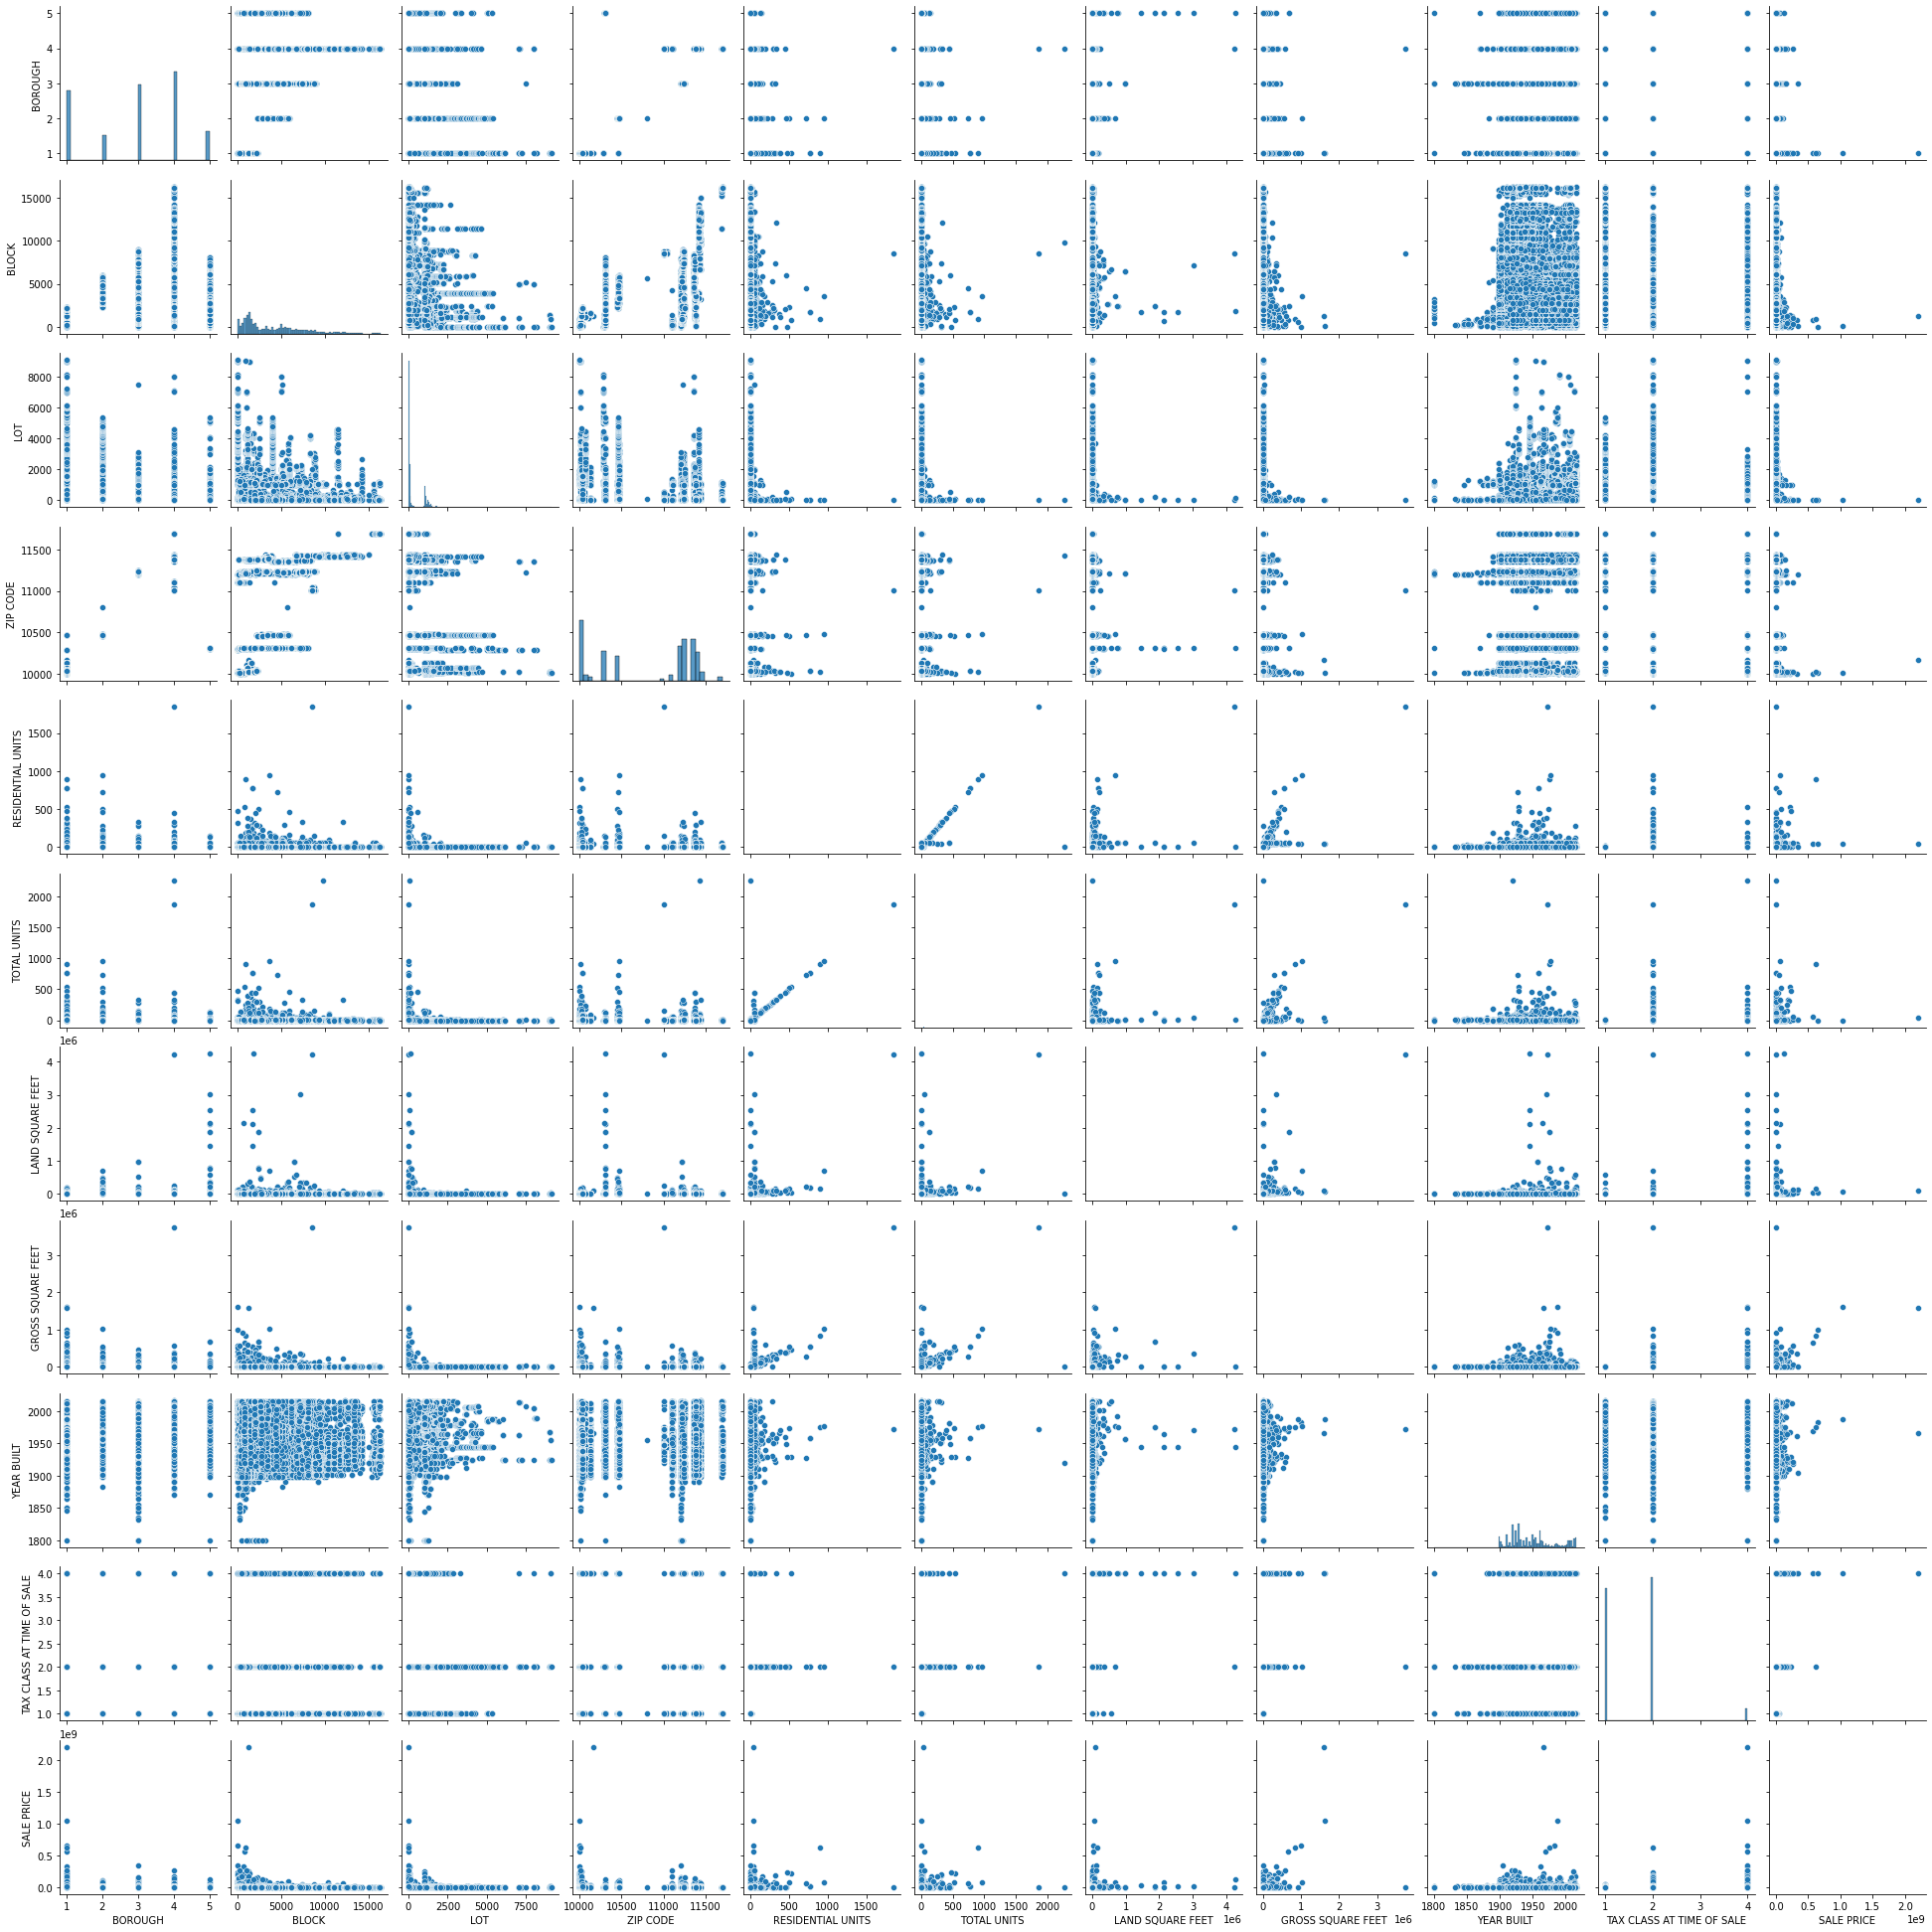

In [5]:
sns.pairplot(df)
plt.show()

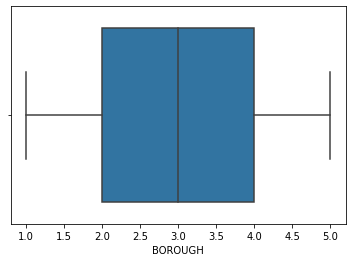

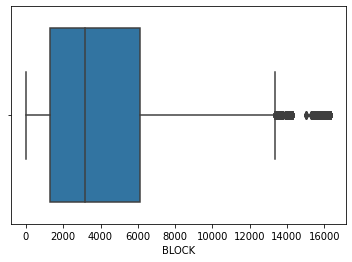

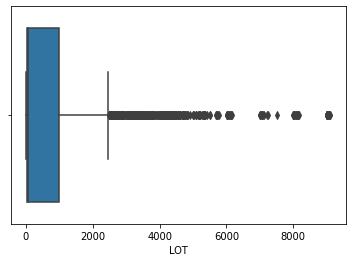

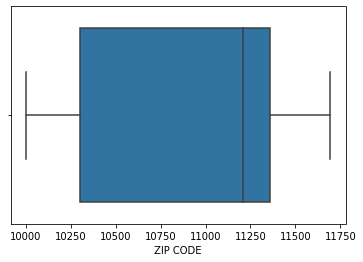

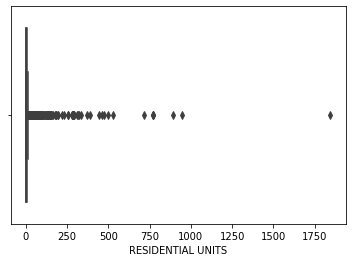

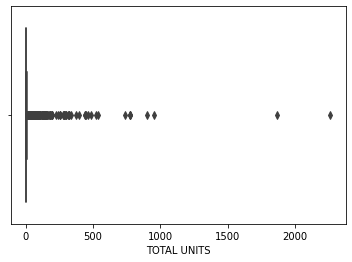

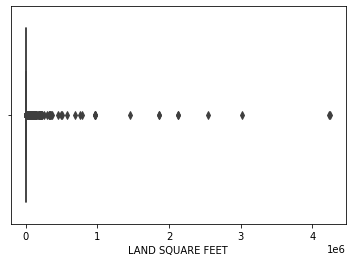

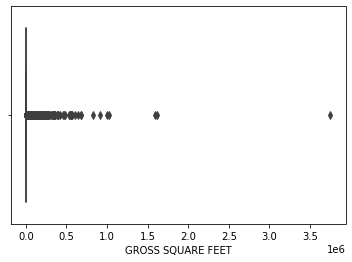

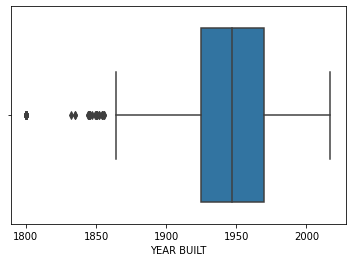

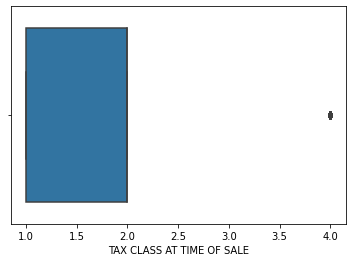

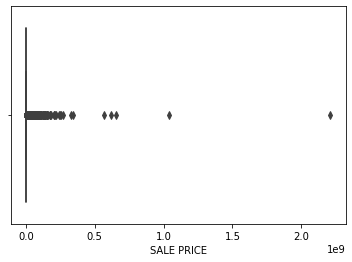

In [7]:
for i in df.select_dtypes(include='number'):
    sns.boxplot(x=df[i],data=df)
    plt.show() 

In [9]:
import warnings
warnings.filterwarnings("ignore")

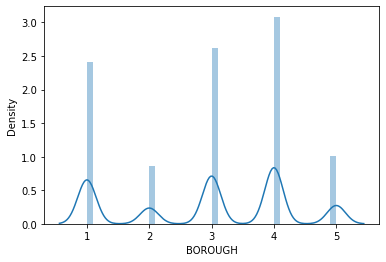

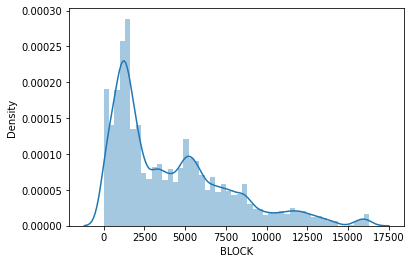

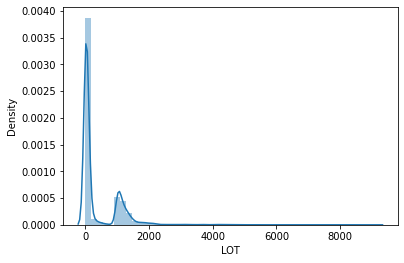

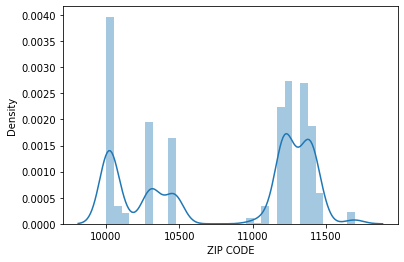

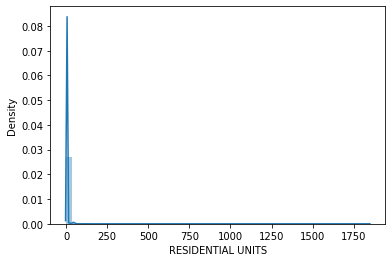

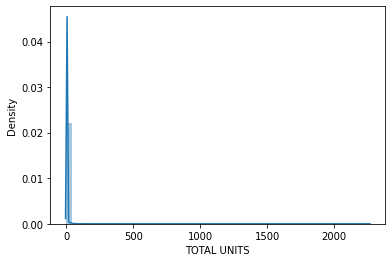

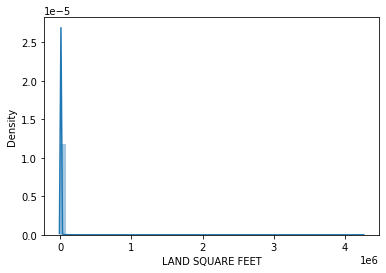

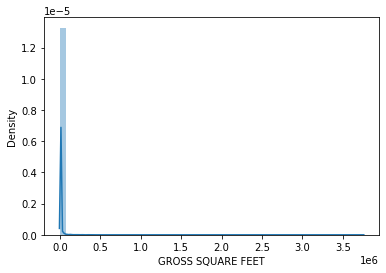

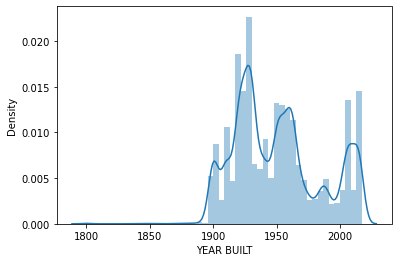

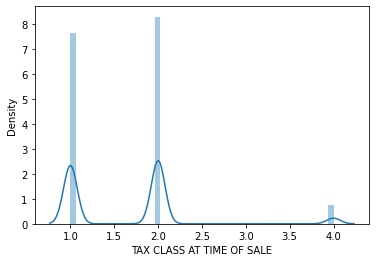

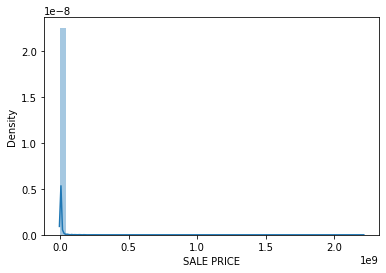

In [10]:
for i in df.select_dtypes(include='number'):
    sns.distplot(df[i])
    plt.show() 

In [11]:
re= df.select_dtypes(include='number')
re.head()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
0,1,392,6,10009,5,5,1633.0,6440.0,1900,2,6625000.0
1,1,402,21,10009,10,10,2272.0,6794.0,1913,2,3936272.0
2,1,404,55,10009,6,6,2369.0,4615.0,1900,2,8000000.0
3,1,406,32,10009,8,8,1750.0,4226.0,1920,2,3192840.0
4,1,387,153,10009,24,24,4489.0,18523.0,1920,2,16232000.0


In [12]:
bor= re['BOROUGH']
tax= re['TAX CLASS AT TIME OF SALE']
yr = re['YEAR BUILT']
zip = re['ZIP CODE']

re.drop(['BOROUGH', 'TAX CLASS AT TIME OF SALE', 'YEAR BUILT', 'ZIP CODE'], axis=1, inplace=True)

In [13]:
re.head()

,BLOCK,LOT,RESIDENTIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
0,392,6,5,5,1633.0,6440.0,6625000.0
1,402,21,10,10,2272.0,6794.0,3936272.0
2,404,55,6,6,2369.0,4615.0,8000000.0
3,406,32,8,8,1750.0,4226.0,3192840.0
4,387,153,24,24,4489.0,18523.0,16232000.0


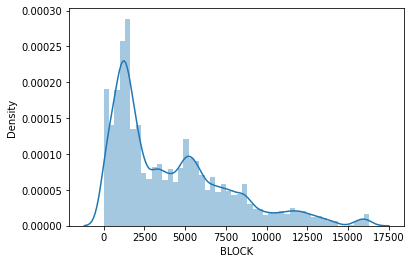

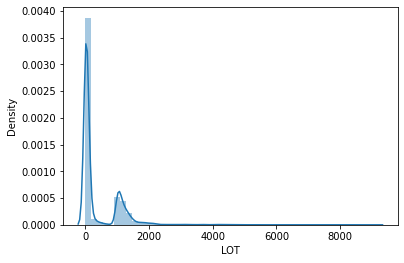

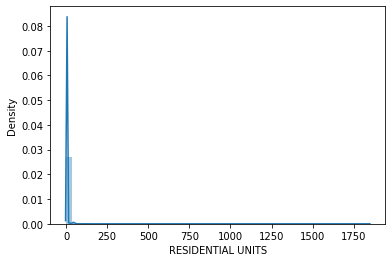

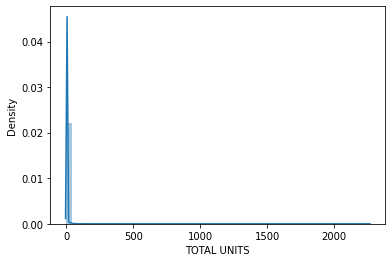

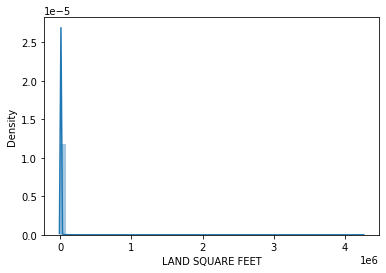

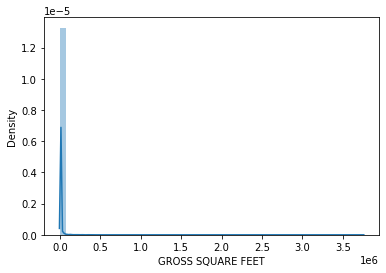

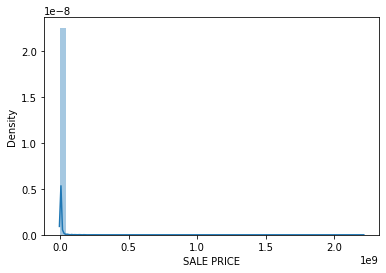

In [14]:
for i in re.columns:
    sns.distplot(re[i])
    plt.show() 

In [21]:
from sklearn.preprocessing import PowerTransformer

pt= PowerTransformer(method='box-cox')
fr = pt.fit_transform(re)
fr

array([[-1.46602489, -1.19766955,  1.14048932, ..., -0.68536108,
         1.1065003 ,  2.17440505],
       [-1.45346912, -0.59478966,  1.64600424, ..., -0.18898137,
         1.15539227,  1.59267747],
       [-1.45098316, -0.13086523,  1.29149248, ..., -0.1254712 ,
         0.81350402,  2.39949587],
       ...,
       [ 0.98514437, -0.08891443,  0.12297921, ...,  0.68326751,
        -0.04460134, -0.28866437],
       [ 0.94009714, -0.45622478,  2.3458568 , ...,  7.62995607,
         3.75555987,  2.87731652],
       [ 0.94100483,  1.08253167, -1.03969247, ...,  2.28418893,
         0.29215905, -1.4241751 ]])

In [22]:
et= pd.DataFrame(fr, columns= re.columns)
et.head()

,BLOCK,LOT,RESIDENTIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
0,-1.466025,-1.197670,1.140489,1.237629,-0.685361,1.106500,2.174405
1,-1.453469,-0.594790,1.646004,1.692042,-0.188981,1.155392,1.592677
2,-1.450983,-0.130865,1.291492,1.376598,-0.125471,0.813504,2.399496
3,-1.448505,-0.391893,1.502590,1.566387,-0.582126,0.739272,1.374278
4,-1.472383,0.362666,2.072836,2.047154,0.864608,2.175197,3.318364


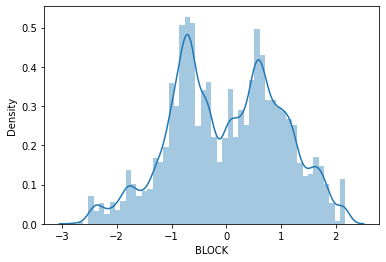

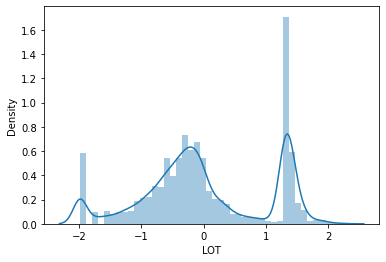

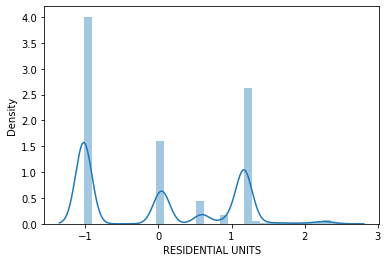

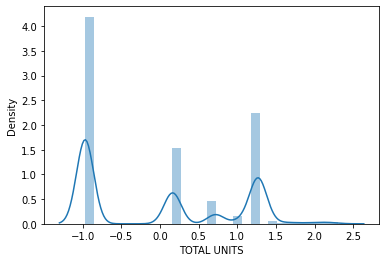

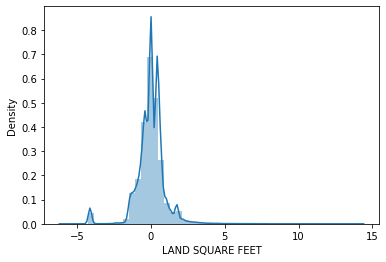

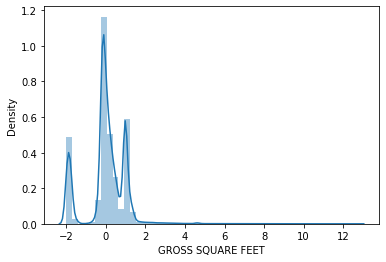

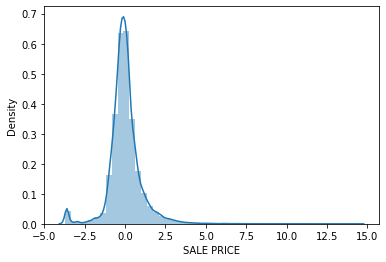

In [20]:
for i in et.columns:
    sns.distplot(et[i])
    plt.show() 

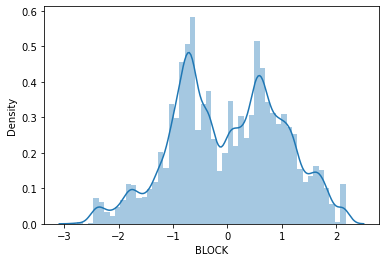

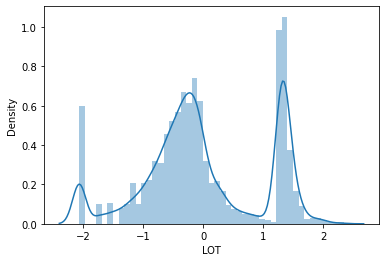

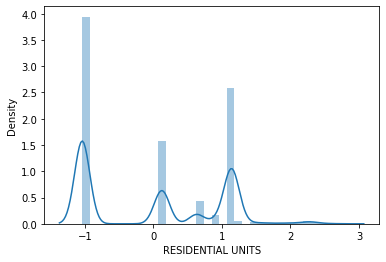

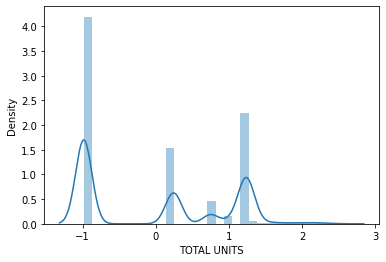

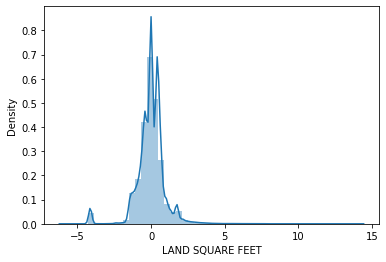

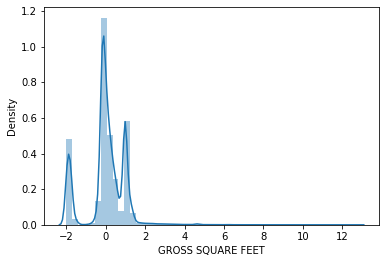

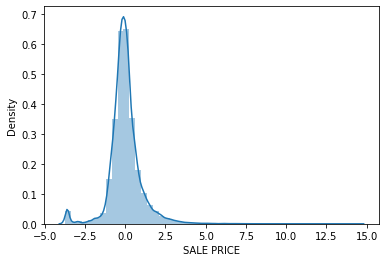

In [28]:
for i in et.columns:
    rf = et[i]
    sns.distplot(rf)
    plt.show()